In [1]:
# project: p2
# submitter: zzhou443
# partner: none
# hours: 9

In [2]:
import loans
import matplotlib.pyplot as plt
import pandas as pd
import search
from time import time

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
applicant = loans.Applicant(3, 1)
applicant.race

{'American Indian or Alaska Native'}

In [5]:
applicant = loans.Applicant("<20", ["1", "2", "3"])
applicant.race

{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [6]:
repr(applicant)

"Applicant('<20', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])"

In [7]:
applicant.lower_age()

20

In [8]:
sorted([
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
])

[Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American']),
 Applicant('<25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('>75', ['Other Pacific Islander', 'Samoan'])]

In [9]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}

In [10]:
loan = loans.Loan(values)

In [11]:
loan.interest_rate

3.0

In [12]:
loan.applicants

[Applicant('55-64', ['White'])]

In [13]:
print(loan)

<Loan: 3.0% on $285000.0 with 1 applicant(s)>


In [14]:
for amt in loan.yearly_amounts(20000):
    print(amt)

225000.0
211750.0
198102.5
184045.575
169566.94225000002
154653.95051750002
139293.56903302504
123472.3761040158
107176.54738713628
90391.84380875036
73103.59912301287
55296.70709670326
36955.60830960436
18064.27655889249


In [15]:
list_bank = pd.read_json("banks.json")

In [16]:
lei = 0
for i in range(len(list_bank)):
    if list_bank.loc[i]["name"] == "University of Wisconsin Credit Union":
        lei = list_bank.loc[i]["lei"]
lei

'254900CN1DD55MJDFH69'

In [17]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.lei

'254900CN1DD55MJDFH69'

In [18]:
#import zipfile
#import io
#import csv

#zf = zipfile.ZipFile("wi.zip")
#f = zf.open("wi.csv")
#reader = csv.DictReader(io.TextIOWrapper(f))
#print(uwcu.bank_loan_list[-1])

In [19]:
len(uwcu.bank_loan_list)

21153

In [20]:
len(uwcu)

21153

In [21]:
uwcu[-1]

<Loan: 2.99% on $185000.0 with 2 applicant(s)>

In [22]:
tree = search.BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

C : [33]
B : [22]
A : [9, 5]


In [23]:
t = search.BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4


In [24]:
t.root.lookup("C")
t["C"]

[1, 4]

In [25]:
bank = loans.Bank("First Home Bank")
assert bank.lei == "549300DMI3W6YLDVSK93"

In [26]:
#Q1: what is the average interest rate for the bank?
#Skip missing loans where the interest rate is not specified in your calculation
total = 0
bank_num = 0
for i in range(len(bank)):
    if bank[i].interest_rate == -1:
        continue
    else:
        bank_num = bank_num + 1
        total = total + bank[i].interest_rate
total / bank_num

2.962962962962963

In [27]:
#Q2: how many applicants are there per loan, on average?
loan_num = 0
applicant_num = 0

for i in range(len(bank)):
    applicant_num = applicant_num + len(bank[i].applicants)
    loan_num = loan_num + 1
applicant_num / loan_num

1.5777777777777777

In [28]:
#Q3: what is the distribution of ages?
dic_age = {}

for i in range(len(bank)):
    for j in range(len(bank[i].applicants)):
        if (bank[i].applicants[j].age) not in dic_age:
            dic_age[bank[i].applicants[j].age] = 1
        else:
            dic_age[bank[i].applicants[j].age] = dic_age[bank[i].applicants[j].age] + 1
dic_age

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [29]:
tree = search.BST()
for i in range(len(bank)):
    tree.add(bank[i].interest_rate, bank[i])

In [30]:
#Q4 how many interest rate values are missing?
len(tree[-1])

18

In [31]:
def count_height(root):
    if root == None: 
        return 0
    return 1 + (max(count_height(root.left), count_height(root.right)))

In [32]:
#Q5: how tall is the tree?
count_height(tree.root)

9

In [33]:
bank = loans.Bank("University of Wisconsin Credit Union")

In [34]:
tree = search.BST()

In [35]:
time_list = []
time_list.append(0)
time_total = 0
x_axis = []
x_axis.append(0)
x = 0
for i in range(len(bank)):
    time_before = time()
    tree.add(bank[i].interest_rate, bank[i])
    time_after = time()
    time_total = time_total + (time_after - time_before)
    time_list.append(time_total)
    x = x + 1
    x_axis.append(x)

In [36]:
import pandas as pd
df = pd.DataFrame(pd.Series(time_list, index = x_axis))

Text(0, 0.5, 'Total Elapsed Milliseconds')

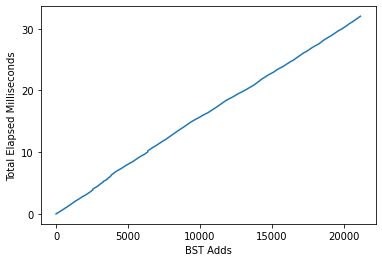

In [37]:
#Q6
graph = df.plot.line(yticks = [0, 0.01, 0.02, 0.03], legend = False)
graph.set_yticklabels([0, 10, 20, 30])
graph.set_xlabel("BST Adds")
graph.set_ylabel("Total Elapsed Milliseconds")

In [38]:
Loop = 0
missing = 0
time_start = time()
for i in range(len(bank)):
    if bank[i].interest_rate == -1:
        missing = missing + 1
time_end = time()
Loop = time_end - time_start

Text(0, 0.5, 'Milliseconds')

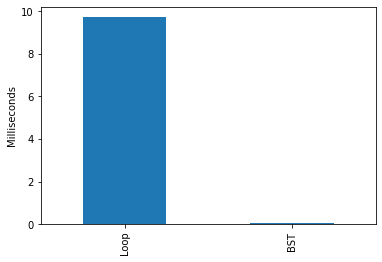

In [39]:
#Q7: how fast are tree lookups?
BST = 0
time_start = time()
len(tree[-1])
time_end = time()
BST = time_end - time_start
data = {"Loop": Loop, "BST": BST}
df = pd.DataFrame([Loop, BST], index = ["Loop", "BST"])
graph = df.plot.bar(legend = False, yticks = [0, 0.002, 0.004, 0.006, 0.008, 0.01])
graph.set_yticklabels([0, 2, 4, 6, 8, 10])
graph.set_ylabel("Milliseconds")

Text(0, 0.5, 'amount')

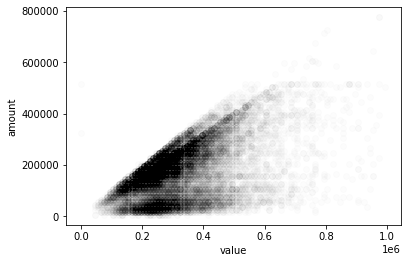

In [40]:
#Q8: what is the relationship between property value and loan amount?
value_list = []
amt_list = []
for i in range(len(bank)):
    if bank[i].interest_rate == -1:
        continue
    if bank[i].property_value > 1000000:
        continue
    value_list.append(bank[i].property_value)
    amt_list.append(bank[i].loan_amount)
x = value_list
y = amt_list
graph = plt.scatter(x, y, color = "black", alpha = 0.01)
plt.yticks([0, 200000, 400000, 600000, 800000])
plt.xlabel("value")
plt.ylabel("amount")

Text(0, 0.5, 'number of applicants')

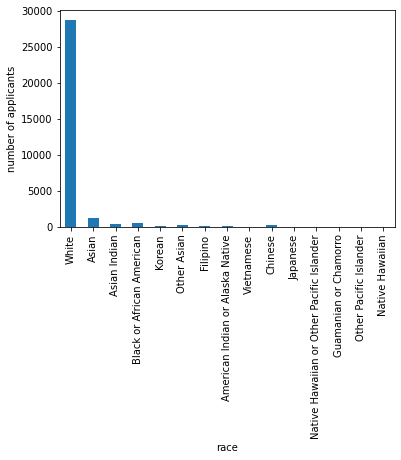

In [41]:
#Q9: what is the distribution of race for UWCU loan applicants?
dic_race = {}
for i in range(len(bank)):
    for j in range(len(bank[i].applicants)):
        for k in bank[i].applicants[j].race:
            if k not in dic_race:
                dic_race[k] = 1
            else:
                dic_race[k] = dic_race[k] + 1
dic_race

df = pd.DataFrame(dic_race.values(), index = dic_race.keys())
graph = df.plot.bar(legend = False)
graph.set_xlabel("race")
graph.set_ylabel("number of applicants")

In [42]:
def count_node(root):
    if root == None:
        return 0
    return 1 + count_node(root.left) + count_node(root.right)

In [43]:
#Q10
count_node(tree.root)

32